# Iris Dataset with K-Nearest Neighbors
Like many machine-learning algorithms, decision trees can be used for both classification and regression problems. When we implement the trees for regression, each time a new branch is created, the predicted value for the dependent variable will be the average of the observations that fall within it. Thus, the criterion to separate will be the one that minimizes the error between the real values and the predicted value.

### Load dataset


In [13]:
# General libraries and drive mounting
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns
import sklearn as sk

Scikit-learn modules for classification trees and metrics to evaluate our model:

In [14]:
# Specific modules for decision trees
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

# Módulos utiles para evaluar el modelo 
from sklearn.model_selection import train_test_split # Para separar en train y test
from sklearn.metrics import plot_confusion_matrix

In [15]:
from sklearn.datasets import load_iris
data = load_iris()
species = [data['target_names'][x] for x in data['target']]
df = pd.DataFrame(np.column_stack([data['data'], species]), columns=data['feature_names'] + ['species'])

## Exploratory Data Analysis

In [4]:
print('Dimension of the dataset: {}'.format(df.shape))
# Preview of the data
df.head(100)

Dimension of the dataset: (150, 5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,versicolor
96,5.7,2.9,4.2,1.3,versicolor
97,6.2,2.9,4.3,1.3,versicolor
98,5.1,2.5,3.0,1.1,versicolor


- There are 150 observations with 4 features each (sepal length, sepal width, petal length, petal width).
- There are no null values, so we don't have to worry about that.
- There are 50 observations of each species (setosa, versicolor, virginica).}



In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   sepal length (cm)  150 non-null    object
 1   sepal width (cm)   150 non-null    object
 2   petal length (cm)  150 non-null    object
 3   petal width (cm)   150 non-null    object
 4   species            150 non-null    object
dtypes: object(5)
memory usage: 6.0+ KB


In [6]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150,150,150,150,150
unique,35,23,43,22,3
top,5.0,3.0,1.4,0.2,versicolor
freq,10,26,13,29,50


In [8]:
from funpymodeling.exploratory import status

status(df)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,sepal length (cm),0,0.0,0,0.0,35,object
1,sepal width (cm),0,0.0,0,0.0,23,object
2,petal length (cm),0,0.0,0,0.0,43,object
3,petal width (cm),0,0.0,0,0.0,22,object
4,species,0,0.0,0,0.0,3,object


Analyze how many of each species we have to predict

## Viz

We create some variables

In [7]:
spec = df['species'].value_counts()

In [8]:
sp = df['sepal length (cm)'].value_counts()

In [9]:
sw = df['sepal width (cm)'].value_counts()

In [10]:
pl = df['petal length (cm)'].value_counts()

In [11]:
pw = df['petal width (cm)'].value_counts()

Text(0.5, 1.0, 'Number of samples per species')

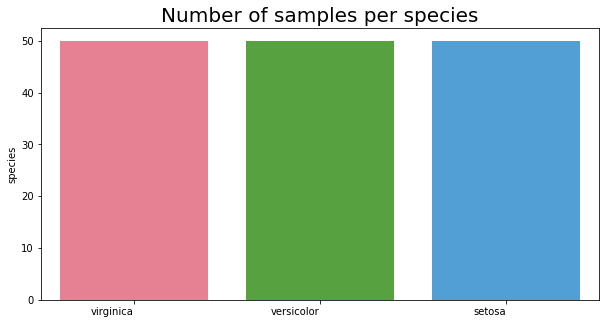

In [14]:
plt.figure(figsize=(10,5))
plot = sns.barplot(x=spec.head(3).index, y=spec, palette="husl")
plot.set_xticklabels(plot.get_xticklabels(), rotation=0, horizontalalignment='right')
plot.set_title("Number of samples per species", fontsize=20)

Text(0.5, 1.0, 'Species & their sepal length (cm)')

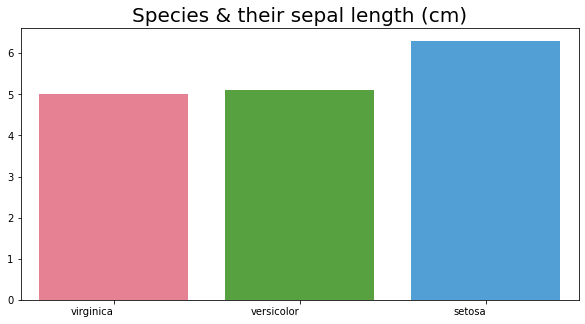

In [15]:
plt.figure(figsize=(10,5))
plot = sns.barplot(x=spec.head(3).index, y=sp.head(3).index, palette="husl")
plot.set_xticklabels(plot.get_xticklabels(), rotation=0, horizontalalignment='right')
plot.set_title("Species & their sepal length (cm)", fontsize=20)

Text(0.5, 1.0, 'Species & their sepal width (cm)')

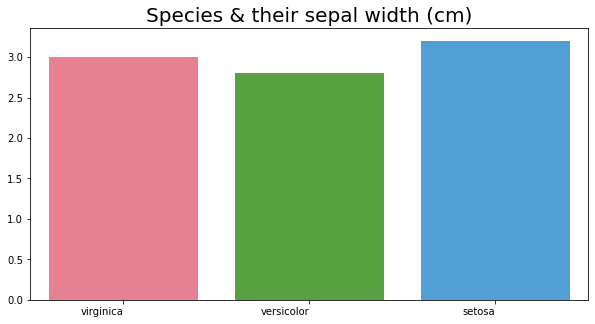

In [16]:
plt.figure(figsize=(10,5))
plot = sns.barplot(x=spec.head(3).index, y=sw.head(3).index, palette="husl")
plot.set_xticklabels(plot.get_xticklabels(), rotation=0, horizontalalignment='right')
plot.set_title("Species & their sepal width (cm)", fontsize=20)

Text(0.5, 1.0, 'Species & their petal lenght (cm)')

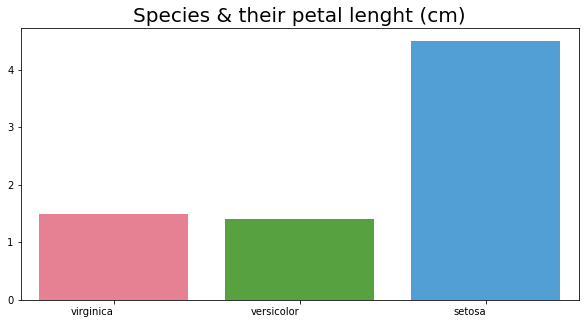

In [17]:
plt.figure(figsize=(10,5))
plot = sns.barplot(x=spec.head(3).index, y=pl.head(3).index, palette="husl")
plot.set_xticklabels(plot.get_xticklabels(), rotation=0, horizontalalignment='right')
plot.set_title("Species & their petal lenght (cm)", fontsize=20)

Text(0.5, 1.0, 'Species & their petal width (cm)')

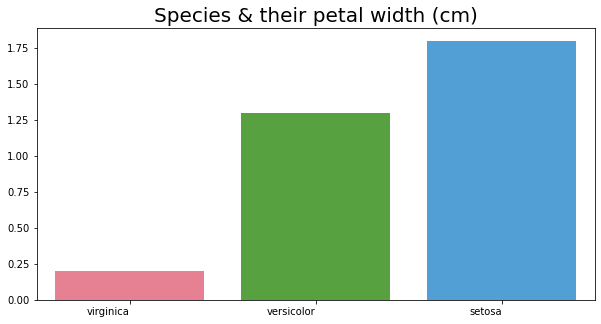

In [18]:
plt.figure(figsize=(10,5))
plot = sns.barplot(x=spec.head(3).index, y=pw.head(3).index, palette="husl")
plot.set_xticklabels(plot.get_xticklabels(), rotation=0, horizontalalignment='right')
plot.set_title("Species & their petal width (cm)", fontsize=20)

## Construction of the model: K-Nearest Neighbors


### Preprocessing: feature selection and separation in training and testing

## Split the dataset into a training set and a testing set

####  Advantages

- By splitting the dataset pseudo-randomly into a two separate sets, we can train using one set and test using another.
- This ensures that we won't use the same observations in both sets.
- More flexible and faster than creating a model using all of the dataset for training.

#### Disadvantages

- The accuracy scores for the testing set can vary depending on what observations are in the set.
- This disadvantage can be countered using k-fold cross-validation.

#### Notes

- The accuracy score of the models depends on the observations in the testing set, which is determined by the seed of the pseudo-random number generator (random_state parameter).
- As a model's complexity increases, the training accuracy (accuracy you get when you train and test the model on the same data) increases.
- If a model is too complex or not complex enough, the testing accuracy is lower.
- For KNN models, the value of k determines the level of complexity. A lower value of k means that the model is more complex.

In [19]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')

In [16]:
labels, counts = np.unique(df['species'], return_counts=True) # Función que devuelve las etiquetas y las frecuencias

print('Labels {}'.format(labels))
print('Frequencies {}'.format(counts))

Labels ['setosa' 'versicolor' 'virginica']
Frequencies [50 50 50]


We separate our data into train and test. We will use a partition of 80% and 20% respectively

In [17]:
random_seed = 7

# Features we are gonna consider 
features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

# Variable we will predict
target = 'species'

# Construction of the matriz of features
X = df[features].to_numpy()

# Construction of the vector we are gonna predict
y = df[target].to_numpy()

# Creation of training and testing matrices
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=random_seed)
print('Dimension of the matrix of features for training: {}'.format(X_train.shape))
print('Dimension of the matrix of features for test: {}'.format(X_test.shape))

Dimension of the matrix of features for training: (120, 4)
Dimension of the matrix of features for test: (30, 4)


## Normalization using *StandardScaler*

In [18]:
# We normalize in train because that way the models work better
# We use StandardScaler to standardize, it is the most common of all but there are others

scaler_train = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler_train.transform(X_train)

## K- Nearest Neighbors Classifier

### Advantages of KNN:
1. Easy to use and interpret (we can understand why we got the prediction we got)

2. Depends on a single hyperparameter

3. Nonparametric

4. Super fast training

5. Useful for recommendation systems

6. Good performance

### Disadvantages of KNN:

1. It is what is called a “lazy learner”: the parameters of an f (x, β) that can be quickly applied to new data are not estimated; each new prediction potentially needs all the data.

2.Because of the previous item, it becomes slow when predicting many labels

3.May have high memory requirements

In [19]:
# Try other numbers for k
# Try other distances, eg: euclidean, minkowski, manhattan
# Try to give more weight to the neighbors of a higher order: weights = 'distance'

knn = KNeighborsClassifier(n_neighbors=11, metric='euclidean') 
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [20]:
y_pred_train = knn.predict(X_train_scaled)
accuracy_train =  accuracy_score(y_pred_train, y_train)
print('The accuracy of the train set is', accuracy_train)

The accuracy of the train set is 0.975


In [21]:
# We normalize in test

scaler_test = preprocessing.StandardScaler().fit(X_test)
X_test_scaled = scaler_test.transform(X_test)

In [22]:
y_pred_test = knn.predict(X_test_scaled)
accuracy_test =  accuracy_score(y_pred_test, y_test)
print('The accuracy of the test set is', accuracy_test)

The accuracy of the test set is 0.8666666666666667


## Visualization of the confusion matrix

Here we are going to visualize the confusion matrix which is a specific table layout that allows visualization of the performance of an algorithm, typically a supervised learning one. Each row of the matrix represents the instances in an actual class while each column represents the instances in a predicted class, or vice versa.

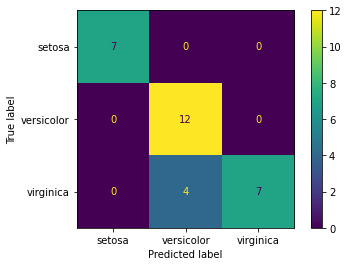

In [36]:
# Whenever there is a classification problem, we make a confusion matrix

graph = plot_confusion_matrix(knn, X_test_scaled, y_test)  
graph